In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import normaltest, kruskal

**Dataset --> [Airbnb Listings Bangkok](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF?usp=sharing)**

# **Bussines Understanding**

Airbnb adalah sebuah platform online yang memungkinkan orang untuk menyewakan hunian atau kamar mereka kepada tamu. Platform ini menyediakan layanan bagi pemilik hunian (host) untuk menawarkan tempat tinggal, dan bagi penyewa (guest) untuk menemukan akomodasi sementara, mulai dari Entire Room atau Apartemen hingga hotel dan Sharing Room. Platform ini juga mencakup proses listing, pencarian, pemesanan, dan pembayaran dilakukan secara online, serta fitur ulasan dan rating untuk membantu memastikan kepercayaan dan keamanan kedua belah pihak.

Airbnb menghasilkan pendapatan dengan mengambil komisi dari setiap pemesanan yang dilakukan melalui platformnya. Komisi ini biasanya diambil dari host dan guest. **Maka dari itu Airbnb sangat bergantung dengan host untuk memperoleh pendapatan**.

**Problem**
- Di beberapa area mungkin memiliki konsentrasi listing yang tinggi, sementara area lain memiliki sangat sedikit, yang menyebabkan distribusi yang tidak merata dan potensi pasar yang belum dimanfaatkan di area yang kurang terwakili.
- Host mungkin kesulitan menetapkan harga optimal yang memaksimalkan hunian dan pendapatan karena kurangnya data perbandingan harga.
- Listing dengan sedikit atau tanpa ulasan mungkin terlihat kurang kredibel, yang berpotensi menghalangi tamu potensial untuk memesan.

**Tujuan**
- Identifikasi area dengan listing lebih sedikit tetapi permintaan tinggi untuk menyeimbangkan distribusi properti dan meningkatkan tingkat hunian di area yang kurang terwakili.
- Berikan wawasan kepada host tentang harga  berdasarkan jenis kamar dan lokasi untuk membantu mereka menetapkan harga yang kompetitif dan menarik.
- Kembangkan strategi untuk mendorong tamu memberikan ulasan, sehingga meningkatkan kredibilitas listing dan menarik lebih banyak pemesanan.

# **Data Understanding**

In [2]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df.head(1)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.5,2,353,0


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


Pada dataset ini menginformasikan mengenai **tiap-tiap atribut hunian** yang telah terdaftar di Airbnb oleh para host di Bangkok.
Setiap baris nya merepresentasikan **satu hunian yang telah di-listing oleh seorang host**. Terdapat 16 di dalam dataset airbnb_listings_bangkok:

Deskripsi:
1. id = ID unik untuk tiap hunian
1. name = Nama Hunian
1. host_id = ID unik untuk tiap host
1. host_name = Nama Host (yang punya hunian)
1. neighbourhood = Daerah tempat hunian berada (distrik)
1. latitude = Latitude lokasi hunian
1. longitude = Longitude lokasi hunian
1. room_type = Tipe hunian (airbnb), terdapat 4 tipe
    * Entire home 
    * Private room 
    * Shared room
    * Hotel
1. price = Harga sewa per malam (Baht)
1. minimum_nights = Jumlah minimal malam untuk menginap
1. number_of_reviews = Total jumlah review yang diterima
1. last_reviews = Tanggal review terakhir 
1. reviews_per_month = Jumlah review dalamm per bulan
1. calculated_host_listing_count = Total Jumlah hunian yang di-listing oleh host
1. availability_365 = Ketersediaan hunian dalam setahun (365 Days)
1. number_of_reviews_ltm = Jumlah review dalam 12 bulan terakhir




## **Data Types**


Pada bagian ini akan dilakukan pengecekan terhadap tipe data untuk setiap variabel.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

Kolom `last_review` memiliki tipe data yang tidak sesuai. Berdasarkan hasil pengecekan dengan fungsi `.info()`, kolom ini memiliki tipe data `object` , padahal seharusnya bertipe `date_time`.

Dari tipe data yang telah ditampilkan, dapat disimpulkan bahwa terdapat 3 jenis tipe data secara garis besar, yaitu:

* Data Kategori:
    1. name(nominal) 
    1. host_name(nominal)
    1. neighbourhood(nominal)  
    1. room_type(ordinal)

* Data Numerik:
    1. id 
    1. host_id 
    1. latitude 
    1. longitude 
    1. price
    1. minimum_nights 
    1. number_of_reviews 
    1. reviews_per_month 
    1. calculated_host_listing_count 
    1. availability_365 
    1. number_of_reviews_ltm 

* Data Date-Time
    1. last_review

Maka dataset ini memiliki **15854 baris** dan **16 kolom**. Tetapi pada dataset ini terdapat **perbedaan jumlah non-null** yang terjadi pada kolom `name`, `last_review` dan `reviews_per_month` yang mengindikasikan **adanya nilai null dari ke-3 kolom** tersebut dengan kolom yang lainnya.

## **Data Kosong (Missing Value)**

In [6]:
# Mengecek nilai Missing Value
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [7]:
# Proporsi Missing value

null = ['host_name','name','last_review', 'reviews_per_month']

for i in null:
    proporsi = (len(df[df[i].isna()])/len(df)*100)
    print(f'Proporsi nilai missing value pada variabel `{i}` dari total {len(df)} data adalah = {round(proporsi,4)}%')

Proporsi nilai missing value pada variabel `host_name` dari total 15854 data adalah = 0.0063%
Proporsi nilai missing value pada variabel `name` dari total 15854 data adalah = 0.0505%
Proporsi nilai missing value pada variabel `last_review` dari total 15854 data adalah = 36.5208%
Proporsi nilai missing value pada variabel `reviews_per_month` dari total 15854 data adalah = 36.5208%


- Terdapat adanya missing value (nilai null) pada variabel `name`, `last_review`, dan `review_per_month`
- Terdapat **8 data** yang kosong pada variabel name, dengan proporsi sebesar **0.0505 %**
- Variabel `last_review` dan `review_per_month` memiliki jumlah data kosong yang sama, yaitu **5790**, dengan proporsi **36.5208 %**

Dan diketahui bahwa hunian-hunian yang tidak memiliki `last_review` dan `reviews_per_month` pasti memiliki nilai `number_of_reviews` yang kosong juga, hal ini dikarenakan hunian tersebut belum pernah di review

Dan belum ada kejelasan pasti untuk kolom `name` yang kosong, bisa saja terdapat kesalahan pengisian oleh Host saya mendaftar layanan.

## **Data Formatting**

### **Number of Unique**

Bagian ini akan menampilkan jumlah data unik pada setiap kolom beserta contoh nilai unikny

In [8]:
# Looping untuk mengambil nilai unik dari setiap kolom

pd.set_option('display.max_colwidth', 120)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
tabel1Desc = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Total Unique', 'Sampel Unique'],
                     data=listItem)
tabel1Desc

,Nama Kolom,Jumlah Total Unique,Sampel Unique
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254,..."
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one be..."
2,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 2129668, 222005, 7045870, 9181769, 5171292, 263049, 9279712, 284095, 515347..."
3,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimonpak, Athitaya, Jiraporn, Nol, Somsak, Tor, Jing, Mimi, Natcha, Srisuk..."
4,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, Bang Kho laen, Rat Burana, Chatu Chak, Khlong San, Bang Rak, Phaya Thai..."
5,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76872, 13.69757, 13.68556, 13.82925, 13.81693, 13.7204, 13.71934, 13.774..."
6,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 100.63338, 100.5288, 100.49535, 100.56737, 100.56433, 100.50757, 100.51..."
7,room_type,4,"[Entire home/apt, Private room, Hotel room, Shared room]"
8,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700, 1150, 1893, 1862, 910, 1400, 4156, 1577, 122594, 5680, 5034, 1500, 13..."
9,minimum_nights,86,"[3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 180, 90, 5, 358, 1125, 29, 14, 200, 365, 120, 9, 12, 300, 360, 100, 10,..."


### **Checking Data Duplicate**

Bagian ini akan mengecek nilai nilai data yang memiliki Duplicate

In [9]:
# Mengecek kolom yang tidak memilii duplikat

for column in df.columns:
    duplicate_rows = df[df[column].duplicated()]
    if duplicate_rows.empty:
        print(f"Kolom '{column}' tidak memiliki duplikasi")

Kolom 'id' tidak memiliki duplikasi


Dari pengecekan, didapatkan bahwa kolom `id` tidak memiliki duplikat. Hal ini sudah tergambarkan dari proses pengecekan jumlah nilai unik (Number of Unique) yang sebelumnya dilakukan, di mana kolom `id` memiliki jumlah nilai unik yang sama dengan jumlah total data. Dengan kata lain, setiap nilai dalam kolom `id` adalah unik. 

Hal ini berbeda dengan kolom lainnya, semisal pengecekan data duplikat dilakukan berdasarkan variabel `room_type`, akan banyak data yang terdeteksi sebagai duplikat. Hal ini dikarena hanya terdapat 4 tipe yang tersedia, sehingga duplikasi menunjukkan `room_type` yang sama muncul berkali-kali dalam data.

**Dapat disimpulkan bahwa pada dataset ini tidak memiliki data yang duplikat.**

## **Descriptive Analysis**

Analisis Deskriptif adalah analisis singkat untuk mengetahui posisi data yang sedang diolah. Hal ini dilakukan untuk menarik gambaran secara singkat dataset yang ada.

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [11]:
df.describe(include='object')

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


Dari analisis deskriptif singkat, baik pada data numerik maupun kategorikal, terdapat anomali pada nilai minimal kolom `price`. Nilai terendah pada kolom tersebut adalah **0 (nol)**, yang menunjukkan bahwa terdapat penginapan atau hunian yang menawarkan sewa secara gratis. Hal tersebut **sangat tidak memungkinkan suatu penginapan atau hunian memberikan sewa secara gratis**. Untuk mengatasi anomali ini, perlu dilakukan analisis lebih lanjut.


### **Correlation - Associaton**

Korelasi hanya dapat dilakukan pada Data Numerik saja, maka dari itu kita pisahkan terlebih dahulu dengan membuat Variabel baru dengan nama `df_num`

In [12]:
df_num = df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]

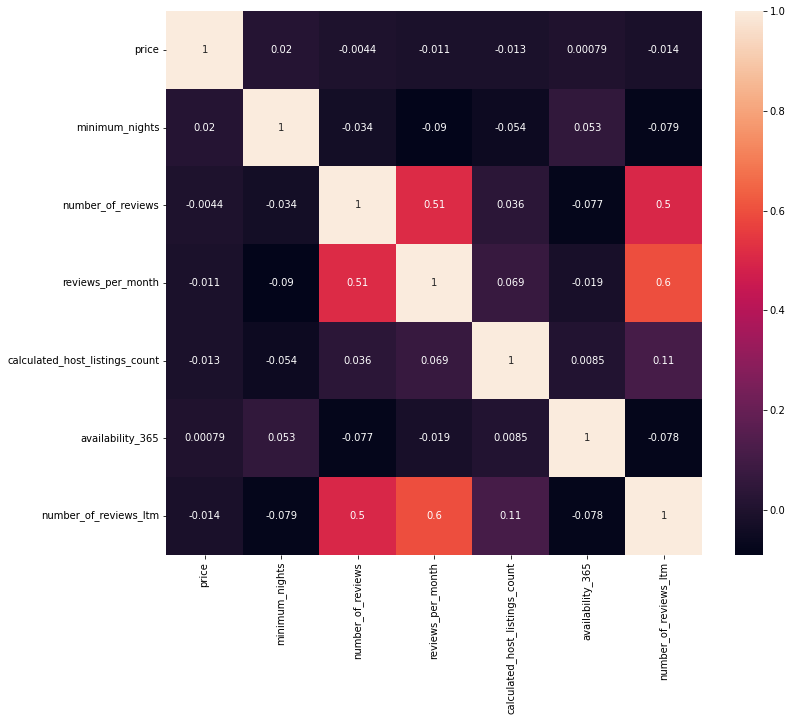

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df_num.corr(),annot = True)
plt.show()

Dari hasil analisis korelasi tidak ditemukan korelasi yang signifikan, hanya terdapat hubungan antar review yang dapat diamati. Hal ini memungkinkan tidak adanya insight yang didapatkan dari analisis korelasi.

### **Checking Outlier**

Outlier pun hanya dapat dilakukan pada kolom kolom yang termasuk kedalam Data Numerik (`df_num`)

In [14]:
# Visualisasi Box Plot untuk tiap Kolom 
colors = px.colors.qualitative.Plotly
fig = None
for column, color in zip(df_num.columns, colors):
    fig = px.box(df_num, y=df_num[column], color_discrete_sequence=[color], title=f'Boxplot of {column}')
    fig.show()

# Tabel untuk hasil tiap box plot dan jumlah outliers

# Iterasi untuk setiap kolom numerik
outlier_info = []
for col in df_num.columns:
    q1 = df_num[col].quantile(0.25)
    median = df_num[col].median()
    q3 = df_num[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = df_num[col].min()
    upper_bound = q3 + 1.5 * iqr
    outliers = df_num[(df_num[col] < lower_bound) | (df_num[col] > upper_bound)]
    num_outliers = len(outliers)
    outlier_info.append([col, lower_bound, q1, median, q3, upper_bound, iqr, num_outliers])


outlier_df = pd.DataFrame(outlier_info, columns=['Nama Kolom', 'Lower Bound', 'Q1', 'Median', 'Q3', 'Upper Bound', 'IQR', 'Jumlah Outliers'])
outlier_df.sort_values('Jumlah Outliers', ascending=False).reset_index(drop=True)

,Nama Kolom,Lower Bound,Q1,Median,Q3,Upper Bound,IQR,Jumlah Outliers
0,minimum_nights,1.00,1.00,1.000,7.00,16.00,6.00,3168
1,number_of_reviews,0.00,0.00,2.000,13.00,32.50,13.00,2240
2,number_of_reviews_ltm,0.00,0.00,0.000,3.00,7.50,3.00,2219
3,calculated_host_listings_count,1.00,1.00,4.000,13.00,31.00,12.00,1832
4,price,0.00,900.00,1429.000,2429.00,4722.50,1529.00,1403
5,reviews_per_month,0.01,0.12,0.435,1.06,2.47,0.94,693
6,availability_365,0.00,138.00,309.000,360.00,693.00,222.00,0


Dari hasil pemeriksaan outliers menggunakan visualisasi dan perhitungan manual, didapatkan kolom `minimum_nights` memiliki jumlah outliers lebih banyak dibandingkan dengan kolom yang lain.

### **Data Distribution** 

Selanjutnya akan menguji data apakah data terdistribusi normal atau tidak, menggunakan `scipy-normaltest` untuk setiap kolom dengan Data Numerik

In [15]:
# Melakukan uji normaltest

normality_results = []
for col in df_num.columns:
    stat, p = normaltest(df_num[col])
    normal = "Berdistribusi normal" if p > 0.05 else "Tidak Berdistribusi normal"  # Ambil alpha = 0.05 sebagai batas signifikansi
    normality_results.append([col, stat, p, normal])


normality_df = pd.DataFrame(normality_results, columns=['Kolom', 'Test Statistic', 'p-value', 'Asumsi'])
normality_df

,Kolom,Test Statistic,p-value,Asumsi
0,price,43049.944446,0.0,Tidak Berdistribusi normal
1,minimum_nights,22191.920998,0.0,Tidak Berdistribusi normal
2,number_of_reviews,19164.706395,0.0,Tidak Berdistribusi normal
3,reviews_per_month,NaN,NaN,Tidak Berdistribusi normal
4,calculated_host_listings_count,16475.886965,0.0,Tidak Berdistribusi normal
5,availability_365,12899.894275,0.0,Tidak Berdistribusi normal
6,number_of_reviews_ltm,24897.587195,0.0,Tidak Berdistribusi normal


Berdasarkan uji normalitas data menggunakan `scipy-normaltest` didapatkan bahwa semua data yang ada pada kolom Data Numerik diasumsikan **tidak berdistribusi normal**.

# **Data Manipulation and Cleansing**

Pada bagian ini data akan di manipulasi dan juga akan di bersihkan untuk mempermudah analisis serta meningkatkan kualitas data.

Sebelumnya ditemukan bahwa kolom `last_review` seharusnya adalah `datetime` bukan `object` , maka kita akan mengubah tipe data dari kolom `last_review` menjadi datetime

In [16]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

Pada pengecekan missing value, ditemukan bahwa kolom `name` dan `host_name` tidak memiliki alasan yang cukup jelas mengapa kolom tesebut kosong. Maka dari itu akan dilakukan pembersihan pada kolom tersebut dengan menghapus nilai null pada kolom `name` dan `host_name`

In [18]:
df.dropna(subset=['name'], inplace=True)

In [19]:
df.dropna(subset=['host_name'], inplace=True)

Mengisi data kosong pada kolom `reviews_per_month` menjadi nol(0), karna memang tidak ada review pada saat itu.

In [20]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

Karena tidak akan menggunakan kolom `last_review` secara signifikan kedepannya. Maka kolom `last_review` yang kosong akan dibiarkan memiliki nilai **NaT (Not a Time)**

Pada pengencakan Analisis Deskriptif ditemukan anomali bahwa adanya hunian dengan `price` bernilai 0 (nol), hal ini tidak memungkinkan. Maka sebaiknya dilakukan clenasing atau penghapusan pada data yang memiliki `price` = 0

In [21]:
df.drop(df[df['price'] == 0].index, inplace=True)

In [22]:
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,0.00,14,365,0


**Hasil Data Manipulation dan Cleansing**

- Didapatkan perubahan dimensi data yang awalnya 15854 menjadi 15845 baris, karena dilakukan pembersihan pada 8 data kosong pada kolom `name` dan 1 data anomali pada kolom `price`
- Membuat nilai default data kosong pada kolom `last_review` dengan default data kosong NaT(Not a time)
- Membuat nilai default data kosong pada kolom `reviews_per_month` dengan 0

# **Exploratory Data Analysis**

### **Neighbourhood Analysis (District)**

- Apakah semua distrik di Bangkok(Thailand) sudah memiliki layanan Airbnb?
- Distrik mana saja yang termasuk Top 10 Distrik dengan jumlah listing terbanyak?

In [23]:
df['neighbourhood'].nunique()

50

Pada data terdapat 50 distrik yang ada, menurut [Wikipedia](https://id.wikipedia.org/wiki/Daftar_distrik_Bangkok) Bangkok memiliki 50 Distrik. Hal ini menjelaskan bahwa semua distrik di Bangkok sudah memiliki layanan Airbnb

In [24]:
df.groupby('neighbourhood').count()['id']

neighbourhood
Bang Bon                   5
Bang Kapi                259
Bang Khae                 92
Bang Khen                116
Bang Kho laen            140
Bang Khun thain           21
Bang Na                  457
Bang Phlat               216
Bang Rak                 827
Bang Sue                 250
Bangkok Noi              152
Bangkok Yai               90
Bueng Kum                 54
Chatu Chak               548
Chom Thong                74
Din Daeng                443
Don Mueang               167
Dusit                     91
Huai Khwang             1125
Khan Na Yao               55
Khlong Sam Wa             32
Khlong San               357
Khlong Toei             2096
Lak Si                   126
Lat Krabang              149
Lat Phrao                 57
Min Buri                  62
Nong Chok                 14
Nong Khaem                 9
Parthum Wan              455
Phasi Charoen            155
Phaya Thai               422
Phra Khanong             557
Phra Nakhon              619


In [25]:
top_10_neighbourhoods= (df.groupby('neighbourhood')
                         .count()['id']
                         .sort_values(ascending=False)
                         .head(10)
                         .reset_index())

fig = px.bar(top_10_neighbourhoods, 
             x='neighbourhood', 
             y='id', 
             title='Top 10 Neighbourhoods by Number of Listing',
             labels={'neighbourhood': 'Neighbourhood (District)', 'id': 'Number of Listing'},
             text='id')

fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

Ditemukan bahwa Distrik Vadhana merupakan Distrik yang memiliki Layanan Airbnb terbanyak dibandingkan Distrik lainnya. Hal ini dikarenakan **Vadhana berada di Central Kota Bangkok**

### **Price Analysis**

- Hunian yang termasuk Top 10 dengan harga tertinggi?
- Bagaimana pusat data (Central of Tendency) `price` dari setiap distrik?
- Apakah `price`untuk setiap tipe hunian itu sama?

In [26]:
df.sort_values(by='price', ascending=False).head(10)[['name', 'neighbourhood', 'price']]

,name,neighbourhood,price
12868,New 1 bedroom apartment BTS MRT Asoke,Vadhana,1100000
12300,3B中文No Guest Service Fee@Nana Asok/Soi11 Nightlife,Vadhana,1014758
6289,BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR,Khlong Toei,1000000
1239,"Modern,wifi,5m MRT&2 Shopping Mall",Huai Khwang,1000000
4620,"Modern&Luxury apartment,5min to MRT,freeWifi",Huai Khwang,1000000
9345,1BR cozy condo close to ONNUT BTS.,Khlong Toei,1000000
1779,"2 Bedroom,wifi,5mMRT&Shopping Mall",Huai Khwang,1000000
15200,80米轻轨站，空中泳池+健身房，I con siam沙吞河景圈，距离大皇宫4公里，乳胶床垫,Khlong San,710760
4373,rm 1 : cozy & comfy,Bang Phlat,600700
11885,🎗𝘾𝙝𝙚𝙬𝙖𝙩𝙝𝙖𝙞 𝙍𝙖𝙢𝙠𝙝𝙖𝙢𝙝𝙖𝙚𝙣𝙜\nBy KhunGrape,Bang Kapi,429443


Ditemukan bahwa ada 7 hunian yang memiliki **harga tertinggi ≥ 1000000 Baht**  dan dari ke-7 hunian tersebut tersebar di 3 distrik yaitu **Vadhana, Huang Khwang dan Khlong Toei**. Dimana distrik-distrik tersebut ada di tengah-tengah kota Bangkok

In [27]:
df.groupby('neighbourhood')['price'].median().reset_index().sort_values(by='price', ascending=False)

,neighbourhood,price
27,Nong Chok,2539.0
29,Parthum Wan,2400.0
47,Vadhana,2000.0
39,Samphanthawong,2000.0
8,Bang Rak,1850.0
34,Pom Prap Sattru Phai,1709.0
22,Khlong Toei,1700.0
37,Ratchathewi,1536.0
43,Taling Chan,1502.5
25,Lat Phrao,1500.0


Pusat Data pada tiap distrik di Kota bangkok, 

Dikarenakan data yang tidak terdistribusi normal maka digunakan nya **median** sebagai ukuran (pusat data)

Didapatkan bahwa distrik dengan hunian harga tertinggi (median) adalah distrik **Nong Chok**	

In [28]:
# H0: Median harga hunian Airbnb untuk seluruh tipe sama
# H1: Setidaknya ada 1 pasang tipe hunian  yang mediannya tidak sama

entire_home = df[df['room_type'] == 'Entire home/apt']['price']
private_room = df[df['room_type'] == 'Private room']['price']
hotel_room = df[df['room_type'] == 'Hotel room']['price']
shared_room = df[df['room_type'] == 'Shared room']['price']


statistic, p_value = kruskal(entire_home, private_room, hotel_room, shared_room)
alpha = 0.05
print(f"Nilai uji Kruskal-Wallis: {statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Terdapat bukti yang cukup untuk menolak hipotesis nol")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol")

Nilai uji Kruskal-Wallis: 1189.0008553107386
P-value: 1.7850102960418103e-257
Terdapat bukti yang cukup untuk menolak hipotesis nol


Dikarenakan data yang tidak terdistribusi normal maka pengujian dilakukan denegan uji non-parametrik menggunakan `Kruskal`. 

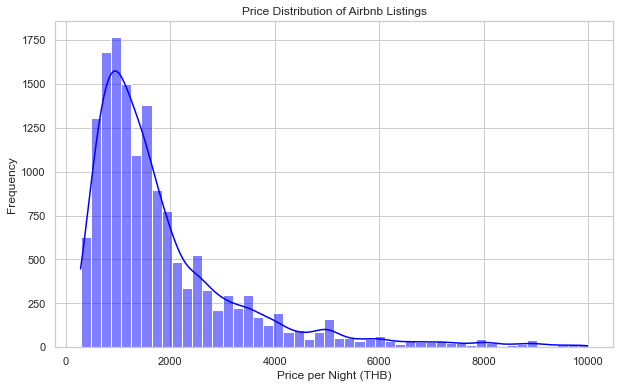

In [29]:
sns.set(style="whitegrid")

# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] < 10000], x='price', bins=50, kde=True, color='blue')
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price per Night (THB)')
plt.ylabel('Frequency')
plt.show()

Hasil Distribusi data pada kolom `price` menunjukkan sebagian besar hunian yang di-listing memiliki harga di bawah **5.000 Baht per malam**, dan kebanyakkan di sekitar **1.000-2.000 Baht**. Ada beberapa listing kelas atas dengan harga lebih tinggi, yang menunjukkan keberagaman harga setiap hunian.

### **Room Type Analysis**

- Tipe hunian apa yang paling banyak tersedia?
- Bagimana distribusi `room_type` terhadap `neighbourhood?`
- Tipe hunian mana yang harga sewanya paling tinggi?

In [30]:
df.groupby('room_type').count()['id'].reset_index()


,room_type,id
0,Entire home/apt,8911
1,Hotel room,648
2,Private room,5762
3,Shared room,523


In [31]:
# Menghitung jumlah id untuk setiap room_type
room_type_counts = df['room_type'].value_counts().reset_index()
room_type_counts.columns = ['room_type', 'count']

labels = room_type_counts['room_type']
values = room_type_counts['count']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, pull=[0.1, 0, 0, 0])])

fig.update_layout(
    title_text="Distribution of Room Types",
    annotations=[dict(text=f'{len(df)}', x=0.5, y=0.5, font_size=20, showarrow=False)],
)

fig.show()

Dari hasil pie chart, ditemukan bahwa Tipe Hunian `Entire home/apt` memiliki proporsi yang lebih besar dibandingkan tipe hunian yang lain.

In [32]:
tipe_distrik = pd.crosstab(df['neighbourhood'], df['room_type'])
tipe_distrik['Total'] = tipe_distrik.sum(axis=1)
tipe_distrik.sort_values('Total', ascending=False)

room_type,Entire home/apt,Hotel room,Private room,Shared room,Total
neighbourhood,,,,,
Vadhana,1451,104,542,53,2150
Khlong Toei,1520,73,488,15,2096
Huai Khwang,776,25,301,23,1125
Ratchathewi,656,70,326,61,1113
Bang Rak,351,67,375,34,827
Sathon,557,15,220,17,809
Phra Nakhon,56,77,355,131,619
Phra Khanong,336,9,200,12,557
Chatu Chak,273,2,266,7,548


Dari distribusi diatas ditemukan bahwa pada masing masing distrik memiliki `room_type` dengan **entire home/apt** kebanyakan.

In [33]:
fig = px.bar(df.groupby('room_type')['availability_365'].mean().reset_index(), x='room_type', y='availability_365',color='room_type',
             labels={'room_type': 'Room Type', 'availability_365': 'Average Availability (365 days)'},
             title='Average Availability of Listings by Room Type')

fig.show()

Meskipun Entire Home/Apt memiliki jumlah hunian yang paling banyak, tetapi ditemukan bahwa **Entire Home/Apt hanya memiliki rata-rata yang lebih kecil dibandingkan `room_type` yang lainnya**.

In [34]:
fig = px.bar(df.groupby('room_type')['price'].median().reset_index(), x='room_type', y='price',color='room_type',
             labels={'room_type': 'Room Type', 'price': 'Baht per Night'},
             title='Median Price of Listings by Room Type')

fig.show()

Dari median harga yang ditentukan berdasarkan `room_type` nya ditemukan bahwa `room_type` **Hotel Room memiliki nilai median yang tertinggi (mahal)**

### **Review Analysis**

- Tipe hunian yang memiliki jumlah review terbanyak?
- Apakah jumlah review mempengaruhi harga?

In [35]:
df.groupby('room_type')['number_of_reviews'].sum().reset_index()

,room_type,number_of_reviews
0,Entire home/apt,197943
1,Hotel room,12700
2,Private room,50701
3,Shared room,2682


`room_type` Entire Home/Apt memiliki total review paling banyak, hal ini sejalan dengan banyak nya hunian yang listing dari `room_type` Entire Home/Apt

In [36]:
df.groupby(df['last_review'].dt.year)['number_of_reviews'].sum().reset_index()

,last_review,number_of_reviews
0,2012.0,4
1,2013.0,30
2,2014.0,16
3,2015.0,182
4,2016.0,852
5,2017.0,1398
6,2018.0,3978
7,2019.0,10616
8,2020.0,31423
9,2021.0,4199


Menghitung total review dari tahun pertama Airbnb ada di Bangok hingga tahun terakhir data ini disebarkan, menunjukkan peningkatan yang signifikan untuk layana Airbnb di Kota bangkok

In [37]:
spearman_corr = df[['price', 'number_of_reviews']].corr(method='spearman')
fig = px.imshow(spearman_corr,
                labels={'x': 'Features', 'y': 'Features', 'color': 'Spearman Correlation'},
                x=['price', 'number_of_reviews'],
                y=['price', 'number_of_reviews'],
                color_continuous_scale='RdBu',
                title='Spearman Correlation Heatmap: Price vs Number of Reviews')

annotations = []
for i, row in enumerate(spearman_corr.values):
    for j, value in enumerate(row):
        annotations.append(dict(x=j, y=i, text=f"{value:.2f}", showarrow=False, font_size=12, font_color='white'))

fig.update_layout(annotations=annotations)
fig.show()

Ditemukan bahwa tidak adanya hubungan yang baik anatara `price` dengan `number_of_reviews`

# **Insight and Recommendation**

**Insight**
1.	Neighbourhood Analysis (District)
    -	Layanan Airbnb sudah tersebar ada di seluruh distrik Kota Bangkok. 
    -	Adanya keberagaman jumlah hunian pada setaip Distrik
    -   10 Distrik dengan jumlah hunian yang di-listing menunjukkan di mana layanan Airbnb paling terkonsentrasi. Informasi ini berguna bagi `host` untuk memahami kejenuhan pasar dan permintaan di wilayah tertentu.
    -	Distrik yang paling banyak memiliki hunian Airbnb adalah Vadhana dengan jumlah 2150. 
    -	Sebaran hunian Airbnb di Bangkok cenderung memusat dan padat pada bagian tengah kota Bangkok.
2.	Price Analysis
    -   sebagian besar hunian yang di-listing memiliki harga di bawah **5.000 Baht per malam**, dan kebanyakkan di sekitar **1.000-2.000 Baht**. Ada beberapa listing kelas atas dengan harga lebih tinggi, yang menunjukkan keberagaman harga setiap hunian.
    -	Meskipun distrik Nong Chok memiliki harga dengan nilai median 2538 Baht dibandingkan ynag lainnya. 
    -	Setiap jenis tipe hunian Airbnb memiliki median harga yang beragam.
3.	Room Type Analysis
    -	Tipe hunian Airbnb yang paling banyak di-listing oleh host adalah `Entire home/apt` dengan proporsi sebesar 56.2% dari total hunian yang ada, lebih dari setengah proporsi dari kesulurahan tipe hunian yang di-listing. 
    -   Tipe hunian Airbnb yang di-listing bergantung pada distrik dimana hunian tersebut berada. 
    -	Mayoritas listing Airbnb cendurung memiliki tipe hunian bertipe `‘Entire home/apt’` diikuti dengan tipe `‘Private room’`, lalu `‘Hotel room’` dan `‘Shared room’`. 
    -	Tipe hunian berjenis ‘Entire home/apt’ memiliki ketersediaan paling sedikit, dapat diartikan tipe hunian tersebut yang paling padat layanan.
    -	Tipe hunian berjenis ‘Hotel Room’ memiliki harga sewa per malamn tertinggi dibanding tipe hunian lainnya.
4.	Review Analysis
    -   Jumlah review hunian bertipe `‘Entire home/apt’` memiliki review yang paling banyak, disusul oleh `‘Hotel room’`, `‘Private room’`, dan `‘Shared room’`. 
    -   Total review dari tahun pertama Airbnb ada di Bangok hingga tahun terakhir data ini disebarkan, menunjukkan peningkatan yang signifikan untuk layanan Airbnb di Kota bangkok
    -	Tidak adanya hubungan antara jumlah review dengan harga sewa.

**Rekomendasi**

-	Fokuskan upaya pemasaran pada area dengan listing lebih sedikit (<150>) tetapi permintaan tinggi. Hal ini dapat membantu menyeimbangkan distribusi properti Airbnb dan berpotensi meningkatkan tingkat hunian di wilayah yang kurang terwakili.
-	`host` harus mempertimbangkan harga yang kompetitif berdasarkan jenis kamar dan lokasi. Memanfaatkan data harga rata-rata dapat membantu menetapkan harga optimal untuk menarik lebih banyak pemesanan sekaligus memaksimalkan pendapatan.
-	Mendorong review dari tamu dapat meningkatkan kredibilitas tempat dan menarik lebih banyak pemesanan. `host` dapat menawarkan insentif (promo) bagi tamu untuk memberikan ulasan.